In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import pandas as pd
import numpy as np
import re
import os
import csv
import datetime

def word_tokenize_zh(text):
    '''
    input: dataframe
    output: list of list of word tokens
    '''
    sentences = []
    stop_words = []
    stop_path = '/Users/maxzhu/Desktop/cn_stopwords'
    stop_words.append(' ')
    stop_words.append('一个')
    stop_words.append('\t')
    stop_words.append('更')
    stop_words.append('…')
    stop_words.append('（')
    stop_words.append(')')
    stop_words.append('(')
    stop_words.append('）')
    stop_words.append('—')
    stop_words.append(',')
    with open(stop_path, "r", encoding='utf8') as f:
            line = f.readlines()                      
            for l in line:
                stop_words.append(l.strip())
    sentences_tokenized = []
    sentences = re.split('[。！？?!/n]', str(text))
    for s in sentences:
        words= jieba.cut(str(s).replace('\n', ''))
        tokens = []
        for word in words:
            if word not in stop_words:  # remove stop words
                tokens.append(word)
        if len(tokens) > 0:
            sentences_tokenized.append(tokens)
    return sentences_tokenized
 


In [4]:
dir = '文史资料/output'
import os
token_df_list = []
for filename in os.listdir(dir):
    if "txt" not in filename:
        continue
    tokens = []
    with open(os.path.join(dir, filename), 'r') as file:
        # Read each line one by one
        for line in file:
            # Process each line as needed
            tokens.extend(word_tokenize_zh(line))
    token_df_list.append([filename, tokens])
print(f"Total {len(token_df_list)} files processed")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/7c/fdmjc9kj7mxgtjskmcwnytxm0000gn/T/jieba.cache
Loading model cost 0.410 seconds.
Prefix dict has been built successfully.


Total 374 files processed


In [5]:
df = pd.DataFrame(token_df_list, columns=['filename', 'tokens'])

In [6]:
len(df)

374

In [27]:
df['token_length'] = df['tokens'].apply(lambda x: sum([len(i) for i in x]))

In [28]:
df['token_length'].sum()

17145230

In [7]:
sents = []
for i in range(len(df)):
    sents.extend(df['tokens'][i])

In [8]:
len(sents)

1215217

In [9]:
#all words
all_words = []
for sent in sents:
    all_words.extend(sent)

In [11]:
# count word in sents
from collections import Counter
word_count = Counter(all_words)
# check specific word

In [14]:
# top 1000 words
word_count.most_common(1000)

[('年', 128842),
 ('､', 114001),
 (':', 106405),
 ('月', 65636),
 ('.', 62912),
 ('中', 53758),
 ('说', 47205),
 ('工作', 45521),
 ('时', 43187),
 (';', 43051),
 ('新疆', 41910),
 ('日', 38985),
 ('当时', 38675),
 ('·', 28961),
 ('部队', 27465),
 ('没有', 26793),
 ('-', 26199),
 ('م', 26163),
 ('同志', 25179),
 ('人民', 24917),
 ('进行', 24340),
 ('情况', 21512),
 ('新', 20588),
 ('派', 20470),
 ('组织', 20150),
 ('发展', 19917),
 ('军', 19834),
 ('民族', 19766),
 ('国民党', 19679),
 ('ر', 19264),
 ('地方', 18962),
 ('地区', 18866),
 ('成立', 18784),
 ('喀什', 18419),
 ('县', 18334),
 ('参加', 18254),
 ('群众', 17914),
 ('学生', 17791),
 ('马', 16428),
 ('里', 16387),
 ('活动', 16239),
 ('副', 16085),
 ('师', 15995),
 ('伊犁', 15947),
 ('政府', 15920),
 ('10', 15762),
 ('中国', 15688),
 ('•', 15620),
 ('生产', 15534),
 ('以后', 15446),
 ('学校', 15396),
 ('领导', 15138),
 ('问题', 14973),
 ('｡', 14506),
 ('会', 13876),
 ('主要', 13839),
 ('三', 13665),
 ('人员', 13441),
 ('代表', 13398),
 ('上海', 13331),
 ('回民', 13168),
 ('二', 13093),
 ('处', 13030),
 ('便', 13002),
 

In [16]:
print(f"Word Count of 毛泽东: {word_count['毛泽东']}")
print(f"Word Count of 中国: {word_count['中国']}")
print(f"Word Count of 人民: {word_count['人民']}")
print(f"Word Count of 回回: {word_count['回回']}")
print(f"Word Count of 回族: {word_count['回族']}")
print(f"Word Count of 维族: {word_count['维族']}")
print(f"Word Count of 突厥: {word_count['突厥']}")
print(f"Word Count of 维吾尔: {word_count['维吾尔']}")
print(f"Word Count of 援疆: {word_count['援疆']}")
print(f"Word Count of 藏人: {word_count['藏人']}")
print(f"Word Count of 起义: {word_count['起义']}")
print(f"Word Count of 发展: {word_count['发展']}")
print(f"Word Count of 回民: {word_count['回民']}")
print(f"Word Count of 蒙古族: {word_count['蒙古族']}")


Word Count of 毛泽东: 1261
Word Count of 中国: 15688
Word Count of 人民: 24917
Word Count of 回回: 1347
Word Count of 回族: 10571
Word Count of 维族: 1857
Word Count of 突厥: 1416
Word Count of 维吾尔: 3202
Word Count of 援疆: 11
Word Count of 藏人: 54
Word Count of 起义: 11367
Word Count of 发展: 19917
Word Count of 回民: 13168
Word Count of 蒙古族: 2035


In [17]:
print(len(sents))
from gensim.models import Word2Vec
model = Word2Vec(sents, min_count=3, vector_size=100, window=5, workers=4)

1215217


In [71]:
print(model.wv.most_similar(positive=['汉族'], topn=10))
print(model.wv.most_similar(positive=['维族'], topn=10))
print(model.wv.most_similar(positive=['阿訇'], topn=10))
print(model.wv.most_similar(positive=['暴徒'], topn=10))
print(model.wv.most_similar(positive=['少数民族'], topn=10))
print(model.wv.most_similar(positive=['回族'], topn=10))
print(model.wv.most_similar(positive=['维吾尔'], topn=10))
print(model.wv.most_similar(positive=['维吾尔族'], topn=10))
print(model.wv.most_similar(positive=['回族'], topn=10))
print(model.wv.most_similar(positive=['马步芳'], topn=10))
print(model.wv.most_similar(positive=['社会主义'], topn=10))
print(model.wv.most_similar(positive=['新疆'], topn=10))
print(model.wv.most_similar(positive=['党'], topn=10))
print(model.wv.most_similar(positive=['共产党'], topn=10))
print(model.wv.most_similar(positive=['国'], topn=10))
print(model.wv.most_similar(positive=['民族'], topn=10))
print(model.wv.most_similar(positive=['国家'], topn=10))
print(model.wv.most_similar(positive=['政府'], topn=10))
print(model.wv.most_similar(positive=['宗教'], topn=10))
print(model.wv.most_similar(positive=['阿古柏'], topn=10))
print(model.wv.most_similar(positive=['盛世才'], topn=10))
print(model.wv.most_similar(positive=['边疆'], topn=10))
print(model.wv.most_similar(positive=['文化'], topn=10))

[('回族', 0.7019929885864258), ('维族', 0.6787109971046448), ('汉', 0.6716533899307251), ('维吾尔族', 0.663534939289093), ('少数民族', 0.6534639000892639), ('蒙族', 0.6529618501663208), ('汉族人', 0.6339589953422546), ('两族', 0.62884920835495), ('俄罗斯族', 0.6260411739349365), ('满族', 0.6251276731491089)]
[('维吾尔族', 0.7629034519195557), ('塔塔尔族', 0.720150351524353), ('蒙族', 0.7198365926742554), ('田风荣', 0.7081815600395203), ('哈族', 0.6935568451881409), ('乌孜别克族', 0.6847003102302551), ('汉族', 0.6787110567092896), ('阿洪', 0.6695907711982727), ('柯尔克孜族', 0.6672236919403076), ('托乎', 0.6492903232574463)]
[('教长', 0.7540971040725708), ('掌教', 0.7293193936347961), ('马良骏', 0.7101374268531799), ('学董', 0.6782296895980835), ('工寺坊', 0.6762010455131531), ('挂帐', 0.6747664213180542), ('满拉', 0.6739317774772644), ('掌坊', 0.661729633808136), ('大寺', 0.6523621082305908), ('寺坊', 0.6495733261108398)]
[('匪徒', 0.8461974263191223), ('追捕', 0.8396086692810059), ('开枪', 0.8356075286865234), ('叛匪', 0.8090121150016785), ('伏击', 0.8047813773155212), ('

In [25]:
print(model.wv.most_similar(positive=['少数民族','建设'], topn=10))
print(model.wv.most_similar(positive=['少数民族','发展'], topn=10))
print(model.wv.most_similar(positive=['新疆','发展'], topn=10))
print(model.wv.most_similar(positive=['少数民族'], negative=['暴徒'], topn=10))
print(model.wv.most_similar(positive=['汉族'], negative=['权利'], topn=10))
print(model.wv.most_similar(positive=['少数民族'], negative=['历史'], topn=10))
print(model.wv.most_similar(positive=['维族'], negative=['历史'], topn=10))
print(model.wv.most_similar(positive=['青海'], negative=['马步芳'], topn=10))

[('四化建设', 0.6692310571670532), ('政权建设', 0.6463261842727661), ('文化教育', 0.6437532901763916), ('党的领导', 0.6315336227416992), ('改革开放', 0.6224469542503357), ('科技', 0.621478796005249), ('各条战线', 0.6182457208633423), ('我州', 0.6168050169944763), ('各族', 0.6122143864631653), ('对外开放', 0.6119358539581299)]
[('大力发展', 0.6701376438140869), ('民族', 0.6408311724662781), ('工农', 0.6322441697120667), ('普及', 0.6272017359733582), ('干部队伍', 0.6195788383483887), ('文化教育', 0.6168860197067261), ('我州', 0.6125581860542297), ('我区', 0.6083400249481201), ('畜牧业', 0.6026681661605835), ('教师队伍', 0.5913065075874329)]
[('大力发展', 0.5946100950241089), ('全疆', 0.5792452692985535), ('蓬勃发展', 0.5592926144599915), ('飞速发展', 0.5529587268829346), ('我区', 0.5489253401756287), ('我县', 0.5473286509513855), ('遍察', 0.5400949716567993), ('繁荣', 0.5264719724655151), ('发达', 0.5154844522476196), ('开发', 0.5110383629798889)]
[('内哈', 0.5793073177337646), ('丛书', 0.5696184039115906), ('文学艺术', 0.5656452775001526), ('胡都木', 0.5549827814102173), ('语言文字', 0.55

/Users/maxzhu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65380 (\N{HALFWIDTH IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maxzhu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1605 (\N{ARABIC LETTER MEEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maxzhu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maxzhu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1585 (\N{ARABIC LETTER REH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maxzhu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1587 (\N{ARABIC LETTER SEEN}) missing from current font.
  fig.canvas.print_figure(

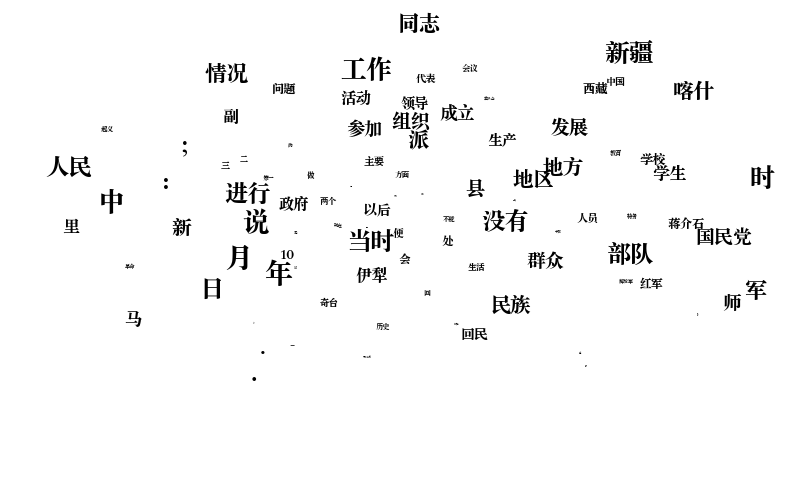

In [72]:
import numpy as np
numWords = 100
targetWords = model.wv.index_to_key[:numWords]
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(model.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix
import sklearn
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import matplotlib.pyplot as plt #For graphics
import matplotlib as mpl
font_name = "Songti SC"
mpl.rcParams['font.family']=font_name
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [41]:
import sklearn.metrics.pairwise
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 14, loc='right')  # Adjust the coordinate of the title
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        # ax.annotate(translate(word), (0, df[dim][i]), color = colors[i], alpha = 0.9, fontsize = 12)
        ax.annotate(translate(word), (0, df[dim][i]), color = colors[i], alpha = 0.9, fontsize = 11)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

# define a function to translate a word using from deep_translator import GoogleTranslator
from deep_translator import GoogleTranslator
def translate(word):
    if word == '维族':
        return 'Uyghur (short)'
    if word == '汉族':
        return 'Han'
    if word == '少数民族':
        return 'Ethnic Minority'
    if word == '回民':
        return 'Hui People'
    elif word == '回族':
        return 'Huizu'
    try:
        return GoogleTranslator(source='auto', target='en').translate(word)
    except:
        return word

Gender = dimension(model.wv, ['男人', '男性', '男'],['女人', '女性', '女'])
Modern = dimension(model.wv, ['现代', '现代化'], ['传统', '古老'])
Civil = dimension(model.wv, ['文明', '文明'], ['野蛮', '粗野'])
Power = dimension(model.wv, ['强大', '强盛'], ['弱小', '衰弱'])
Wealth = dimension(model.wv, ['富裕', '富有'], ['贫困', '贫穷'])
Progress = dimension(model.wv, ['现代'], ['传统'])
Peace = dimension(model.wv, ['和平'], ['粗暴'])
Familiarity = dimension(model.wv, ['熟悉'], ['陌生'])

def makeDF(model, word_list):
    g = []
    g2 = []
    c = []
    m = []
    p = []
    w = []
    pro = []
    pe = []
    f = []
    lo = []
    for word in word_list:
        c.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Civil.reshape(1,-1))[0][0])
        m.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Modern.reshape(1,-1))[0][0])
        p.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Power.reshape(1,-1))[0][0])
        w.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Wealth.reshape(1,-1))[0][0])
        g.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        f.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Familiarity.reshape(1,-1))[0][0])
        pe.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Peace.reshape(1,-1))[0][0])

    df = pd.DataFrame({ 'civilized/barbaric': c, 'powerful/powerless': p, 'wealthy/poor': w, 'male/female': g, 'familiar/strange': f
                        , 'peaceful/violent': pe, 'modern/traditional': m }, index = word_list)
    return df


NationalityDf = makeDF(model.wv, ['维族', '维吾尔族', '汉族', '回族','回民',  '回回'])


/var/folders/7c/fdmjc9kj7mxgtjskmcwnytxm0000gn/T/ipykernel_46476/1651061542.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(translate(word), (0, df[dim][i]), color = colors[i], alpha = 0.9, fontsize = 11)


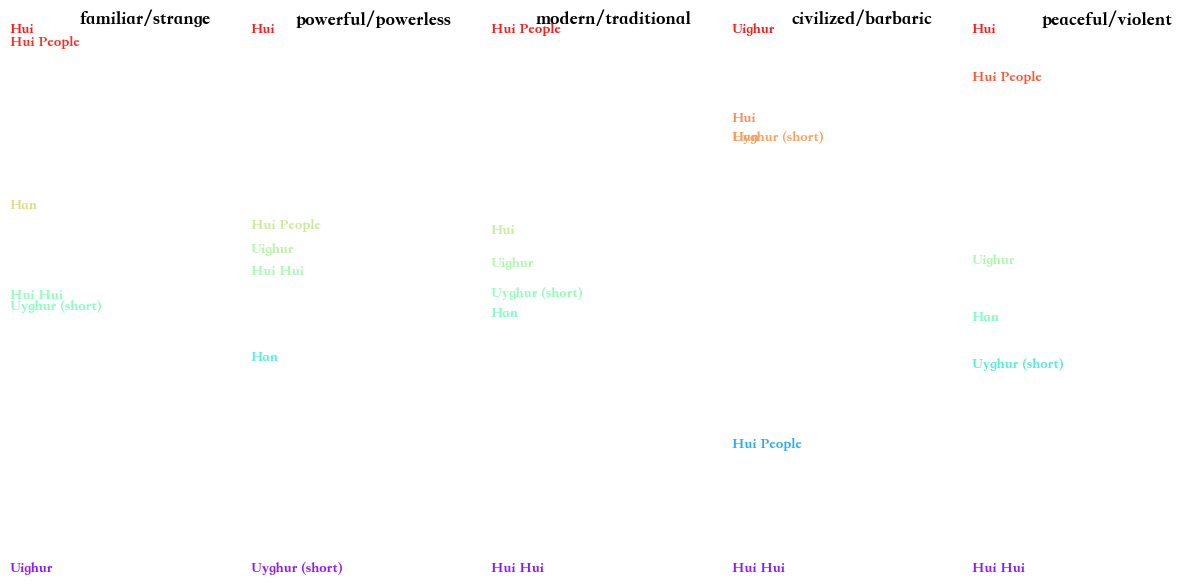

In [43]:
import sklearn
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import matplotlib.pyplot as plt #For graphics
import matplotlib as mpl
font_name = "Songti SC"
mpl.rcParams['font.family']=font_name

fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(151)
PlotDimension(ax1, NationalityDf, 'familiar/strange')
ax2 = fig.add_subplot(152)
PlotDimension(ax2, NationalityDf, 'powerful/powerless')
ax3 = fig.add_subplot(153)
PlotDimension(ax3, NationalityDf, 'modern/traditional')
ax4 = fig.add_subplot(154)
PlotDimension(ax4, NationalityDf, 'civilized/barbaric')
ax5 = fig.add_subplot(155)
PlotDimension(ax5, NationalityDf, 'peaceful/violent')

NameError: name 'PlotDimension' is not defined

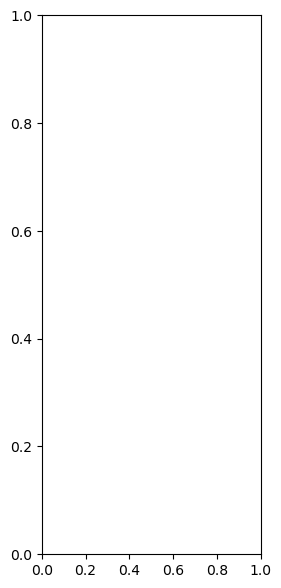

In [21]:
fig = plt.figure(figsize = (13,7))


In [4]:
import re

# Sample filename
def extracted_text(filename):

    # Define the regular expression pattern
    patterns = [r"^(.*?)文史", r"^(.*?)史"]

    extracted_text = 'unknown'
    # Extract the text before "文史" or "史"
    for pattern in patterns:
        # Use re.match to search for the pattern at the beginning of the string
        result = re.match(pattern, filename)

        # Check if the match is found and get the extracted text
        if result:
            extracted_text = result.group(1)
            #print("Extracted text:", extracted_text)
            break
        else:
            continue
    if '回族' in filename or '回民' in filename:
        extracted_text = '回族'

    if '市' in extracted_text:
        pattern = r"^(.*?)市"
        result = re.match(pattern, extracted_text)
        if result:
            extracted_text = result.group(1)
            print("Extracted text:", extracted_text)
    elif '县' in extracted_text:
        pattern = r"^(.*?)县"
        result = re.match(pattern, extracted_text)
        if result:
            extracted_text = result.group(1)
            print("Extracted text:", extracted_text)
    if not extracted_text:
        extracted_text = 'unknown'
    return extracted_text   

In [5]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

dir = '文史资料/output'
import os
token_df_list = []
for filename in os.listdir(dir):
    if "txt" not in filename:
        continue
    tokens = ""
    with open(os.path.join(dir, filename), 'r') as file:
        # Read each line one by one
        for line in file:
            # Process each line as needed
            tokens += line
    token_df_list.append([filename, tokens])
print(f"Total {len(token_df_list)} files processed")


category = '新疆'  # 你的文本数据的分类
df = pd.DataFrame(token_df_list, columns=['filename', 'text'])
print(df.head())

Total 374 files processed
                                   filename  \
0                             克拉玛依文史第6辑.txt   
1  甘肃文史资料选辑_第21辑_马鸿宾史料专辑_中国人民政治协商会议甘肃省委.txt   
2        西藏文史资料选辑_第6辑_西藏自治区政协文史资料研究委员会编.txt   
3                         青海文史资料选辑_第18辑.txt   
4      宁夏文史资料集萃_人物卷_下_宁夏回族自治区政协文史和学习委员会.txt   

                                                text  
0  目录五十年代的石油、地质、调查、勘探1、回忆五十年代的地质调查工作……………范成龙(1)2、...  
1  28甘肃文史资料选輯\n中国人民政治协商会议甘肃省委员会文史资料研究委员会编\n马鸿宾史料专...  
2  西藏文史资料選輯\n第六辑\n西藏自治区政协文史资料研究委员会编SEPT\n西 藏 文 史 ...  
3  《 青海文史资料选辑》第十八辑\n缅怀集\n纪念青海解放四十周年人物史料专辑\n中国人民政治...  
4  宁夏文史资料集萃人物卷正\n宁夏人民出版社\n宁夏回族自治区政协文史和学习委员会编\nZNI...  


In [6]:
df['label'] = df['filename'].apply(extracted_text)

Extracted text: 阿克苏
Extracted text: 阿克苏
Extracted text: 呼图壁
Extracted text: 伊宁
Extracted text: 伊宁
Extracted text: 奇台
Extracted text: 阿克苏
Extracted text: 喀什
Extracted text: 奇台
Extracted text: 伊宁
Extracted text: 奇台
Extracted text: 塔城
Extracted text: 喀什
Extracted text: 哈密
Extracted text: 阿克苏
Extracted text: 木垒
Extracted text: 奇台
Extracted text: 呼图壁
Extracted text: 喀什
Extracted text: 伊宁
Extracted text: 奎屯
Extracted text: 奇台
Extracted text: 喀什
Extracted text: 塔城
Extracted text: 上海
Extracted text: 伊宁
Extracted text: 喀什
Extracted text: 奇台
Extracted text: 奎屯
Extracted text: 奇台
Extracted text: 和硕
Extracted text: 伊宁
Extracted text: 喀什
Extracted text: 额敏
Extracted text: 喀什
Extracted text: 喀什
Extracted text: 呼图壁
Extracted text: 昌吉
Extracted text: 伊宁
Extracted text: 喀什
Extracted text: 奎屯
Extracted text: 阿克苏
Extracted text: 和硕
Extracted text: 奇台
Extracted text: 塔城
Extracted text: 马苏
Extracted text: 奇台
Extracted text: 喀什
Extracted text: 阿克苏
Extracted text: 奇台
Extracted text: 马苏
Extracted text: 木垒
Ext

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba
import pandas as pd
import numpy as np
import re
import os
import csv
import datetime

def word_tokenize_zh(text):
    '''
    input: dataframe
    output: list of list of word tokens
    '''
    text = re.sub(r'\d+', '', text)  # 去除数字
    sentences = []
    stop_words = []
    stop_path = '/Users/maxzhu/Desktop/cn_stopwords'
    stop_words.append(' ')
    stop_words.append('一个')
    stop_words.append('\t')
    stop_words.append('更')
    stop_words.append('…')
    stop_words.append('（')
    stop_words.append(')')
    stop_words.append('(')
    stop_words.append('）')
    stop_words.append('—')
    stop_words.append(',')
    with open(stop_path, "r", encoding='utf8') as f:
            line = f.readlines()                      
            for l in line:
                stop_words.append(l.strip())
    sentences_tokenized = []
    sentences = re.split('[。！？?!/n]', str(text))
    for s in sentences:
        words= jieba.cut(str(s).replace('\n', ''))
        tokens = []
        for word in words:
            if word not in stop_words:  # remove stop words
                tokens.append(word)
        if len(tokens) > 0:
            sentences_tokenized.append(tokens)
    return sentences_tokenized
 
# 应用函数到df的text列
df['tokenized_text'] = df['text'].apply(word_tokenize_zh)
df

,filename,text,label,tokenized_text
0,克拉玛依文史第6辑.txt,目录五十年代的石油、地质、调查、勘探1、回忆五十年代的地质调查工作……………范成龙(1)2、...,克拉玛依,"[[目录, 五十年代, 石油, 地质, 调查, 勘探, 回忆, 五十年代, 地质, 调查, ..."
1,甘肃文史资料选辑_第21辑_马鸿宾史料专辑_中国人民政治协商会议甘肃省委.txt,28甘肃文史资料选輯\n中国人民政治协商会议甘肃省委员会文史资料研究委员会编\n马鸿宾史料专...,甘肃,"[[甘肃, 文史资料, 选輯, 中国人民政治协商会议, 甘肃省, 委员会, 文史资料, 研究..."
2,西藏文史资料选辑_第6辑_西藏自治区政协文史资料研究委员会编.txt,西藏文史资料選輯\n第六辑\n西藏自治区政协文史资料研究委员会编SEPT\n西 藏 文 史 ...,西藏,"[[西藏, 文史资料, 選輯, 第六, 辑, 西藏自治区, 政协, 文史资料, 研究, 委员..."
3,青海文史资料选辑_第18辑.txt,《 青海文史资料选辑》第十八辑\n缅怀集\n纪念青海解放四十周年人物史料专辑\n中国人民政治...,青海,"[[青海, 文史资料, 选辑, 第十八, 辑, 缅怀, 集, 纪念, 青海, 解放, 四十周..."
4,宁夏文史资料集萃_人物卷_下_宁夏回族自治区政协文史和学习委员会.txt,宁夏文史资料集萃人物卷正\n宁夏人民出版社\n宁夏回族自治区政协文史和学习委员会编\nZNI...,回族,"[[宁夏, 文史资料, 集萃, 人物, 卷正, 宁夏人民出版社, 宁夏回族自治区, 政协, ..."
...,...,...,...,...
369,伊犁文史资料第28辑Done.txt,YILI漢學研究中心(國圖)\n3究中心ENESE STUDIES\nWENSHI\nZIL...,伊犁,"[[YILI, 漢學, 研究, 中心, 國圖, 究, 中心, ENESE, STUDIESW..."
370,博尔塔拉文史资料第4辑.txt,BOERTALAWENSHIZILIAO\n第三人的至有些酒会区新重無尔塔拉墓五台要想在二共...,博尔塔拉,"[[BOERTALAWENSHIZILIAO, 第三, 酒会, 区新, 重無尔, 塔拉, 墓..."
371,克拉玛依文史资料选辑第7辑.txt,目录政协克拉玛依市委员会文史资料工作委员会征集文史资料启事序言……\n回忆录\n新中国石油工...,克拉玛依,"[[目录, 政协, 克拉玛依市, 委员会, 文史资料, 工作, 委员会, 征集, 文史资料,..."
372,新疆文史资料精选第1辑.txt,洲民主\n新疆文史资料\n第一個新疆文史资料精选第一辑\n余骏升主编\n*201040453...,新疆,"[[洲, 民主, 新疆, 文史资料, 第一, 個, 新疆, 文史资料, 精选, 第一辑, 余..."


In [8]:
def extract_chinese_name(filePath):
    # 使用正则表达式匹配中文部分
    
    return filePath.replace(".txt", "").replace("_0", "").replace("Done", "").replace('()', '')

# 应用这个函数到每一行的filePath列，并将结果存储在新的列'name'中
df['name'] = df['filename'].apply(extract_chinese_name)

In [9]:
yeardf=pd.read_csv('year-other.csv')
for i in range(len(yeardf)):
    if yeardf['filename'][i] in df['name'].values:
        df.loc[df['name'] == yeardf['filename'][i], 'year'] = yeardf['year'][i]

In [10]:
# fill year nan as unknown
df['year'].fillna('unknown', inplace=True)

In [20]:
for index, row in df.iterrows():
    print(row['tokenized_text'])
    break

[['目录', '五十年代', '石油', '地质', '调查', '勘探', '回忆', '五十年代', '地质', '调查', '工作', '范', '成龙', '回忆', '调处', '工作', '日子', '里', '赵炎', '两次', '南疆', '赵炎', '克拉玛依油田', '初期', '回忆', '回忆', '钻井队', '克拉玛依', '会战', '张云清', '回忆', '战斗', '克拉玛依油田', '日日夜夜', '王大钧', '回忆', '克拉玛依市', '油田', '开发', '初期', '宣传教育', '工作', '何子立', '独山子', '油田', '迭事', '*', '*', '*', '*', '回忆', '三十年', '前', '一段', '往事', '文辉', '二次', '中', '苏', '合营', '正确', '提法', '聂列金', '邵家', '曙', '油田', '保卫', '回忆', '中', '苏', '石油', '公司', '公安局', '组建', '变迁', '宋侃', '克拉玛依市', '公安局', '成立', '刘宝宏', '欧阳', '军', '人物', '补正', '资料', '王玉科', '同志', '写', '回忆', '克拉玛依', '教育', '工作', '一文', '提', '几点', '修正', '意见', '同志', '党员', '领导', '怀念', '瓦力', '斯', '•', '斯地克', '同志', '党和国家', '领导人', '关心', '新疆', '石油工业', '王耀', '张虹', '一九五', '○', '―', '一九六六', '刘宝宏', '新疆', '石油工业', '历史', '意义', '日子', '蔡华', '回忆', '五十年代', '地质', '调查', '工作', '范', '成龙', '新疆', '石油勘探', '一九五一年', '做', '大量', '工作', '包括', '地质', '地球物理', '地球化学', '工种'], ['出色', '完成', '任务', '勘探队员', '不同', '岗位', '恶劣', '条件', '大自然', '进行', '英勇', '搏斗', '涌现出', '大量', '先进人物', '英雄模范', '

In [16]:
import gensim
from gensim.models.doc2vec import TaggedDocument
taggedDocs = []
for index, row in df.iterrows():
    #docKeywords = [row['name']]
    docKeywords = row['label']
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['tokenized_text'], tags = docKeywords))
df['Taggedfile'] = taggedDocs
apsD2V = gensim.models.doc2vec.Doc2Vec(taggedDocs, vector_size = 100)
#print(list(apsD2V.dv.key_to_index.keys()))

TypeError: unhashable type: 'list'

In [17]:
words

NameError: name 'words' is not defined

In [13]:
docKeywords

['纪念中国共产党成立七十周年学术讨论会论文_中国共产党与新疆各族人民的解放', 'nan', 'unknown']

In [ ]:

apsD2V.dv['新疆']

apsD2V.dv['其他地区']

apsD2V.docvecs.most_similar( [ apsD2V.dv['乌鲁木齐文史资料第9辑'] ], topn=5)

keywords = df['year'].unique()
keywords

import sklearn.metrics.pairwise
import numpy as np
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [90]:
df.

,filename,text,label,tokenized_text,name,year,Taggedfile
0,克拉玛依文史第6辑.txt,目录五十年代的石油、地质、调查、勘探1、回忆五十年代的地质调查工作……………范成龙(1)2、...,克拉玛依,"[[目录, 五十年代, 石油, 地质, 调查, 勘探, 回忆, 五十年代, 地质, 调查, ...",克拉玛依文史第6辑,Unknown,"([[目录, 五十年代, 石油, 地质, 调查, 勘探, 回忆, 五十年代, 地质, 调查,..."
1,甘肃文史资料选辑_第21辑_马鸿宾史料专辑_中国人民政治协商会议甘肃省委.txt,28甘肃文史资料选輯\n中国人民政治协商会议甘肃省委员会文史资料研究委员会编\n马鸿宾史料专...,甘肃,"[[甘肃, 文史资料, 选輯, 中国人民政治协商会议, 甘肃省, 委员会, 文史资料, 研究...",甘肃文史资料选辑_第21辑_马鸿宾史料专辑_中国人民政治协商会议甘肃省委,nan,"([[甘肃, 文史资料, 选輯, 中国人民政治协商会议, 甘肃省, 委员会, 文史资料, 研..."
2,西藏文史资料选辑_第6辑_西藏自治区政协文史资料研究委员会编.txt,西藏文史资料選輯\n第六辑\n西藏自治区政协文史资料研究委员会编SEPT\n西 藏 文 史 ...,西藏,"[[西藏, 文史资料, 選輯, 第六, 辑, 西藏自治区, 政协, 文史资料, 研究, 委员...",西藏文史资料选辑_第6辑_西藏自治区政协文史资料研究委员会编,1985,"([[西藏, 文史资料, 選輯, 第六, 辑, 西藏自治区, 政协, 文史资料, 研究, 委..."
3,青海文史资料选辑_第18辑.txt,《 青海文史资料选辑》第十八辑\n缅怀集\n纪念青海解放四十周年人物史料专辑\n中国人民政治...,青海,"[[青海, 文史资料, 选辑, 第十八, 辑, 缅怀, 集, 纪念, 青海, 解放, 四十周...",青海文史资料选辑_第18辑,1989,"([[青海, 文史资料, 选辑, 第十八, 辑, 缅怀, 集, 纪念, 青海, 解放, 四十..."
4,宁夏文史资料集萃_人物卷_下_宁夏回族自治区政协文史和学习委员会.txt,宁夏文史资料集萃人物卷正\n宁夏人民出版社\n宁夏回族自治区政协文史和学习委员会编\nZNI...,回族,"[[宁夏, 文史资料, 集萃, 人物, 卷正, 宁夏人民出版社, 宁夏回族自治区, 政协, ...",宁夏文史资料集萃_人物卷_下_宁夏回族自治区政协文史和学习委员会,2006,"([[宁夏, 文史资料, 集萃, 人物, 卷正, 宁夏人民出版社, 宁夏回族自治区, 政协,..."
...,...,...,...,...,...,...,...
369,伊犁文史资料第28辑Done.txt,YILI漢學研究中心(國圖)\n3究中心ENESE STUDIES\nWENSHI\nZIL...,伊犁,"[[YILI, 漢學, 研究, 中心, 國圖, 究, 中心, ENESE, STUDIESW...",伊犁文史资料第28辑,Unknown,"([[YILI, 漢學, 研究, 中心, 國圖, 究, 中心, ENESE, STUDIES..."
370,博尔塔拉文史资料第4辑.txt,BOERTALAWENSHIZILIAO\n第三人的至有些酒会区新重無尔塔拉墓五台要想在二共...,博尔塔拉,"[[BOERTALAWENSHIZILIAO, 第三, 酒会, 区新, 重無尔, 塔拉, 墓...",博尔塔拉文史资料第4辑,1989,"([[BOERTALAWENSHIZILIAO, 第三, 酒会, 区新, 重無尔, 塔拉, ..."
371,克拉玛依文史资料选辑第7辑.txt,目录政协克拉玛依市委员会文史资料工作委员会征集文史资料启事序言……\n回忆录\n新中国石油工...,克拉玛依,"[[目录, 政协, 克拉玛依市, 委员会, 文史资料, 工作, 委员会, 征集, 文史资料,...",克拉玛依文史资料选辑第7辑,1986,"([[目录, 政协, 克拉玛依市, 委员会, 文史资料, 工作, 委员会, 征集, 文史资料..."
372,新疆文史资料精选第1辑.txt,洲民主\n新疆文史资料\n第一個新疆文史资料精选第一辑\n余骏升主编\n*201040453...,新疆,"[[洲, 民主, 新疆, 文史资料, 第一, 個, 新疆, 文史资料, 精选, 第一辑, 余...",新疆文史资料精选第1辑,Unknown,"([[洲, 民主, 新疆, 文史资料, 第一, 個, 新疆, 文史资料, 精选, 第一辑, ..."
